In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Ajusta el path según donde tengas los datos en tu Drive
OMDENA_PATH = "/content/drive/MyDrive/MCD Folder/2025-1/AAA/De A Mentis/deamentis-fakenews/data/raw/omdena/fake_news_latam_omdena_combined.csv"
POSADAS_PATH = "/content/drive/MyDrive/MCD Folder/2025-1/AAA/De A Mentis/deamentis-fakenews/data/raw/FakeNewsCorpusSpanish/fake_news_corpus_posadas_full.csv"


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Cargar los datasets
df_omdena = pd.read_csv(OMDENA_PATH)
df_posadas = pd.read_csv(POSADAS_PATH)

In [7]:
df_omdena.head()

,Annotation_action,Article_ID,Author,Content,Corrected_label,Date_posted,Link,Prediction,Prediction_prob,Preprocessed_text,Rescaled_prediction_prob,Source,Text,Title,Type,__index_level_0__
0,Don't Annotate,2858,NaN,En un artículo difundido en su sitio personal ...,Fake,2022-03-01,NaN,Fake,0.632735,artículo difundido sitio personal coordinador...,0.132735,proceso,Source:proceso\n\n Prediction:Fake\n\n Content...,NaN,Tweet,140
1,Don't Annotate,2005,NaN,"🔴 El líder nacional de Morena, @mario_delgado ...",True,2022-01-19,NaN,True,0.441359,líder nacional Morena @mario_delgado llamar I...,0.058641,Excelsior,Source:Excelsior\n\n Prediction:True\n\n Conte...,NaN,Tweet,164
2,Annotate,453,NaN,NUEVA YORK.- Ben Simmons aseguró el martes qu...,Fake,NaN,https://vanguardia.com.mx/deportes/ben-simmons...,Fake,0.564037,YORK.- Ben Simmons martes problema mental inic...,0.064037,La Vanguardia,Source:La Vanguardia\n\n Prediction:Fake\n\n C...,Ben Simmons da ‘su verdad’ sobre su salida de ...,Web Article,1449
3,Don't Annotate,590,NaN,Un estudio realizado por la empresa tecnológi...,True,NaN,http://www.elnuevosiglo.com.co/articulos/02-14...,Fake,0.584732,estudio empresa tecnológico gamificación Nawai...,0.084732,El Nuevo Siglo,Source:El Nuevo Siglo\n\n Prediction:Fake\n\n ...,Destacan habilidades profesionales de perfiles...,Web Article,29
4,Don't Annotate,1008,NaN,\nLa Subcomisión Política leyó ayer públic...,True,2020-07-28,https://diario.elmundo.sv/Política/subcomision...,True,0.357733,Subcomisión Política leer públicamente informe...,0.142267,El Mundo,Source:El Mundo\n\n Prediction:True\n\n Conten...,Subcomisión avaló las 75 candidaturas a la C...,Web Article,65


In [8]:
df_posadas

,Id,Category,Topic,Source,Headline,Text,Link,split,ID,CATEGORY,TOPICS,SOURCE,HEADLINE,TEXT,LINK
0,1.0,Fake,Education,El Ruinaversal,"RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...","RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...",http://www.elruinaversal.com/2017/06/10/rae-in...,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Fake,Education,Hay noticia,"La palabra ""haiga"", aceptada por la RAE","La palabra ""haiga"", aceptada por la RAE La Rea...",https://haynoticia.es/la-palabra-haiga-aceptad...,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Fake,Education,El Ruinaversal,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,http://www.elruinaversal.com/2018/05/06/yordi-...,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,True,Education,EL UNIVERSAL,UNAM capacitará a maestros para aprobar prueba...,UNAM capacitará a maestros para aprobar prueba...,http://www.eluniversal.com.mx/articulo/nacion/...,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Fake,Education,Lamula,pretenden aprobar libros escolares con conteni...,Alerta: pretenden aprobar libros escolares con...,https://redaccion.lamula.pe/2018/06/19/memoria...,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,291.0,True,Entertainment,HUFFPOST,Meryl Streep disfrutó unos premios Oscar tan m...,Meryl Streep disfrutó unos premios Oscar tan m...,https://www.huffingtonpost.com.mx/2018/03/06/m...,dev,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1539,292.0,Fake,Entertainment,La voz popular,EL PLAGIO DE LANA DEL REY A RADIOHEAD FUE ACOR...,EL PLAGIO DE LANA DEL REY A RADIOHEAD FUE ACOR...,http://lavozpopular.com/plagio-lana-del-rey-ra...,dev,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1540,293.0,True,Entertainment,Billboard,Ricardo Arjona lanza una serie documental por ...,Ricardo Arjona lanza una serie documental por ...,http://www.billboard.com.ar/noticia/2980/ricar...,dev,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1541,294.0,True,Entertainment,EL UNIVERSAL,Raúl Araiza sorprende a Andrea Legarreta con b...,Raúl Araiza sorprende a Andrea Legarreta con b...,http://www.eluniversal.com.mx/espectaculos/rau...,dev,NaN,NaN,NaN,NaN,NaN,NaN,NaN


🗞️ Omdena Dataset
Dimensiones: (3092, 16)
Etiquetas:
 Corrected_label
True    2070
Fake    1022
Name: count, dtype: int64


,text_length,quote_count,number_count
count,3092.000000,3092.000000,3092.000000
mean,1008.388098,0.505821,3.061772
std,1391.291262,1.647807,6.773815
min,95.000000,0.000000,0.000000
25%,232.000000,0.000000,0.000000
50%,562.500000,0.000000,1.000000
75%,1280.250000,0.000000,3.000000
max,32584.000000,22.000000,95.000000


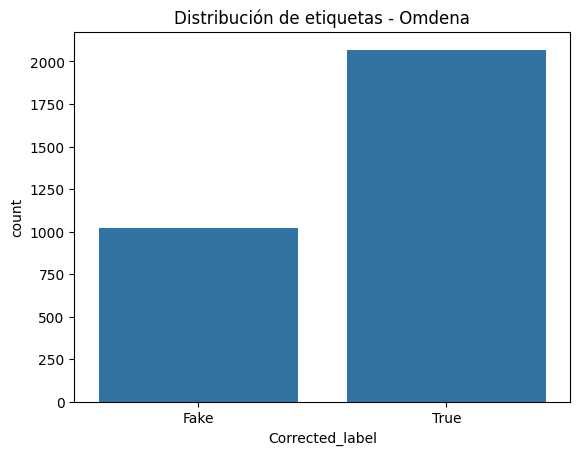

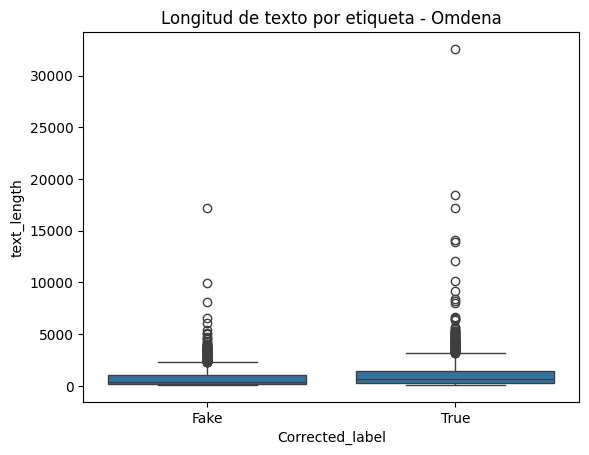

In [9]:
# -------------------
# EDA - OMDENA
# -------------------
print("🗞️ Omdena Dataset")
print("Dimensiones:", df_omdena.shape)
print("Etiquetas:\n", df_omdena["Corrected_label"].value_counts())

# Longitud del texto
df_omdena["text_length"] = df_omdena["Text"].astype(str).apply(len)
df_omdena["quote_count"] = df_omdena["Text"].astype(str).apply(lambda x: len(re.findall(r'"[^"]+"', x)))
df_omdena["number_count"] = df_omdena["Text"].astype(str).apply(lambda x: len(re.findall(r'\b\d+(\.\d+)?\b', x)))

# Estadísticas generales
display(df_omdena[["text_length", "quote_count", "number_count"]].describe())

# Visualizaciones
sns.countplot(data=df_omdena, x="Corrected_label")
plt.title("Distribución de etiquetas - Omdena")
plt.show()

sns.boxplot(data=df_omdena, x="Corrected_label", y="text_length")
plt.title("Longitud de texto por etiqueta - Omdena")
plt.show()

🗞️ Posadas Dataset
Dimensiones: (1543, 15)
Etiquetas:
 Category
True    491
Fake    480
Name: count, dtype: int64


,text_length,quote_count,number_count
count,1543.000000,1543.000000,1543.000000
mean,1483.022683,2.381076,0.001944
std,1777.045140,3.834441,0.044065
min,3.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000
50%,1272.000000,1.000000,0.000000
75%,2243.500000,3.000000,0.000000
max,15344.000000,36.000000,1.000000


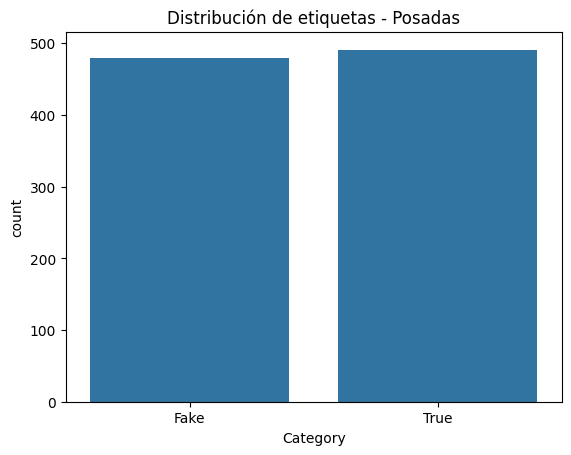

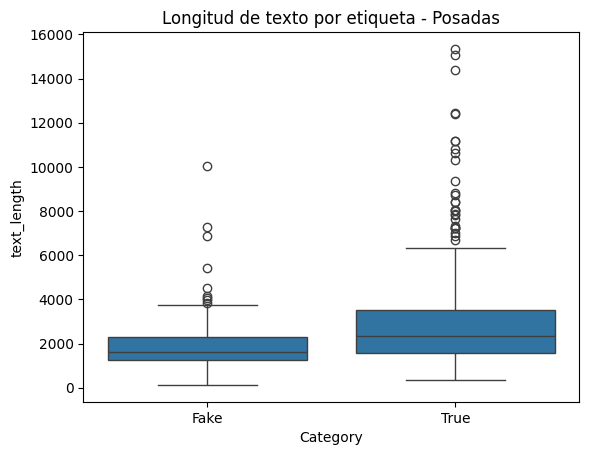

In [10]:
# -------------------
# EDA - POSADAS
# -------------------
print("🗞️ Posadas Dataset")
print("Dimensiones:", df_posadas.shape)
print("Etiquetas:\n", df_posadas["Category"].value_counts())

df_posadas["text_length"] = df_posadas["Text"].astype(str).apply(len)
df_posadas["quote_count"] = df_posadas["Text"].astype(str).apply(lambda x: len(re.findall(r'"[^"]+"', x)))
df_posadas["number_count"] = df_posadas["Text"].astype(str).apply(lambda x: len(re.findall(r'\b\d+(\.\d+)?\b', x)))

# Estadísticas generales
display(df_posadas[["text_length", "quote_count", "number_count"]].describe())

# Visualizaciones
sns.countplot(data=df_posadas, x="Category")
plt.title("Distribución de etiquetas - Posadas")
plt.show()

sns.boxplot(data=df_posadas, x="Category", y="text_length")
plt.title("Longitud de texto por etiqueta - Posadas")
plt.show()


In [11]:
!pip install spacy unidecode
!python -m spacy download es_core_news_sm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 46.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# Omdena

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import umap
import spacy
from unidecode import unidecode
from wordcloud import WordCloud

## Preprocesamiento

In [13]:
# Usaremos solo campos clave
df = df_omdena.copy()
df = df[["Text", "Corrected_label", "Source"]].dropna(subset=["Text"])

# Preprocesar texto para n-gramas
def clean_text(text):
    text = unidecode(text.lower())
    text = re.sub(r'\d+', '', text)  # eliminar números
    text = re.sub(r'[^\w\s]', '', text)  # eliminar puntuación
    return text

df["clean_text"] = df["Text"].astype(str).apply(clean_text)


## 1. Palabras más frecuentes por clase

In [25]:
import spacy
from collections import Counter

# Cargar modelo de spaCy en español (si no lo hiciste antes)
nlp = spacy.load("es_core_news_sm")
stopwords = nlp.Defaults.stop_words

def get_top_words(df_subset, n=20):
    words = " ".join(df_subset["clean_text"]).split()
    words = [w for w in words if w not in stopwords]
    return Counter(words).most_common(n)

print("🔴 Fake News - Palabras frecuentes:")
print(get_top_words(df[df["Corrected_label"] == "Fake"]))

print("\n🟢 True News - Palabras frecuentes:")
print(get_top_words(df[df["Corrected_label"] == "True"]))


🔴 Fake News - Palabras frecuentes:
[('predictionfake', 954), ('ley', 538), ('presidente', 344), ('sourceel', 329), ('asamblea', 321), ('mundo', 307), ('gobierno', 291), ('content', 260), ('legislativa', 238), ('salvador', 236), ('politica', 231), ('comision', 231), ('fmln', 188), ('diputados', 183), ('agua', 180), ('sourcesinembargomx', 179), ('pais', 173), ('sala', 171), ('nacional', 165), ('reforma', 153)]

🟢 True News - Palabras frecuentes:
[('predictiontrue', 1576), ('presidente', 1139), ('partido', 876), ('sourceel', 823), ('gobierno', 821), ('salvador', 821), ('mundo', 752), ('asamblea', 723), ('content', 632), ('nacional', 632), ('pais', 620), ('arena', 589), ('millones', 584), ('fmln', 581), ('legislativa', 557), ('bukele', 527), ('predictionfake', 494), ('diputados', 477), ('personas', 447), ('diputado', 445)]


## 2. Bigramas y Trigramas

In [17]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer

nlp = spacy.load("es_core_news_sm")
stopwords_es = list(nlp.Defaults.stop_words)

def show_top_ngrams(texts, ngram_range=(2,2), n=15):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words=stopwords_es).fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


print("Top Bigramas en Fake News:")
print(show_top_ngrams(df[df["Corrected_label"] == "Fake"]["clean_text"]))

print("\nTop Trigramas en Fake News:")
print(show_top_ngrams(df[df["Corrected_label"] == "Fake"]["clean_text"], (3,3)))


Top Bigramas en Fake News:
[('sourceel mundo', np.int64(234)), ('predictionfake content', np.int64(221)), ('asamblea legislativa', np.int64(220)), ('mundo predictionfake', np.int64(195)), ('sourcesinembargomx predictionfake', np.int64(177)), ('sourceproceso predictionfake', np.int64(122)), ('sourcela vanguardia', np.int64(97)), ('sala constitucional', np.int64(95)), ('vanguardia predictionfake', np.int64(88)), ('nayib bukele', np.int64(78)), ('lopez obrador', np.int64(71)), ('predictionfake contentla', np.int64(61)), ('predictionfake contentel', np.int64(58)), ('informacion publica', np.int64(57)), ('corte suprema', np.int64(56))]

Top Trigramas en Fake News:
[('sourceel mundo predictionfake', np.int64(195)), ('mundo predictionfake content', np.int64(195)), ('sourcela vanguardia predictionfake', np.int64(88)), ('corte suprema justicia', np.int64(50)), ('acceso informacion publica', np.int64(45)), ('sourceel siglo predictionfake', np.int64(41)), ('sourceel pais predictionfake', np.int64

## 3. Análisis de entidades (spaCy)

In [18]:
nlp = spacy.load("es_core_news_sm")

def extract_entities(texts, label):
    ents = []
    for doc in nlp.pipe(texts, disable=["parser", "tagger"]):
        ents += [ent.text for ent in doc.ents if ent.label_ == label]
    return Counter(ents).most_common(10)

top_persons = extract_entities(df["Text"].sample(300), "PER")
top_orgs = extract_entities(df["Text"].sample(300), "ORG")
top_places = extract_entities(df["Text"].sample(300), "LOC")

print("👤 Personas más mencionadas:", top_persons)
print("🏢 Organizaciones más mencionadas:", top_orgs)
print("🌍 Lugares más mencionados:", top_places)


👤 Personas más mencionadas: [('Source', 129), ('Bukele', 28), ('Nayib Bukele', 26), ('También', 23), ('Hacienda', 19), ('Fusades', 19), ('Presidente', 13), ('López Obrador', 13), ('Además', 13), ('agregó', 12)]
🏢 Organizaciones más mencionadas: [('FMLN', 88), ('Asamblea Legislativa', 53), ('ARENA', 36), ('El Mundo\n\n Prediction:True\n\n Content', 35), ('PRD', 20), ('PCN', 18), ('PAN', 15), ('Asamblea', 14), ('UE', 9), ('Congreso', 9)]
🌍 Lugares más mencionados: [('El Salvador', 53), ('Gobierno', 34), ('Estados Unidos', 24), ('Source', 22), ('México', 15), ('Arena', 15), ('Estado', 14), ('San Salvador', 12), ('Gana', 9), ('¿', 9)]


## 4. Distribución de fuentes

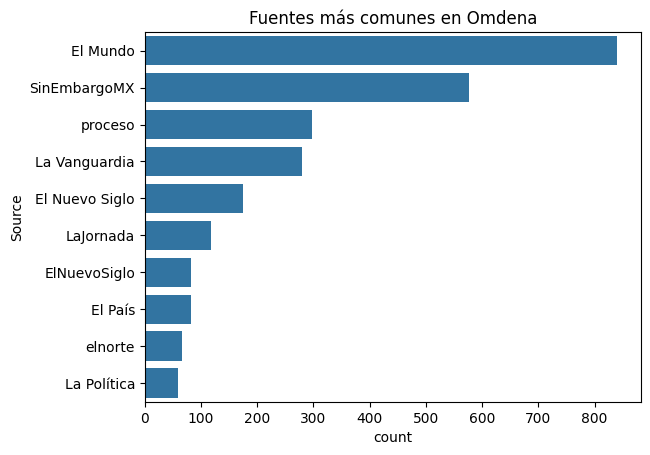

Index(['El Mundo', 'SinEmbargoMX', 'proceso', 'La Vanguardia',
       'El Nuevo Siglo', 'LaJornada', 'ElNuevoSiglo', 'El País', 'elnorte',
       'La Política'],
      dtype='object', name='Source')

In [23]:
sns.countplot(data=df, y="Source", order=df["Source"].value_counts().head(10).index)
plt.title("Fuentes más comunes en Omdena")
plt.show()
df["Source"].value_counts().head(10).index

## 5. Distribución de citas

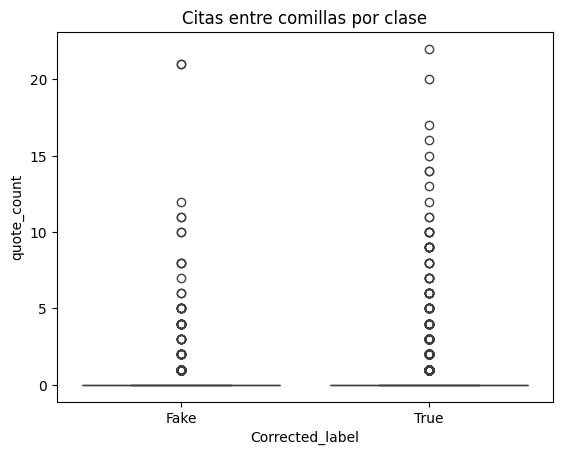

In [26]:
df["quote_count"] = df["Text"].apply(lambda x: len(re.findall(r'"[^"]+"', str(x))))
sns.boxplot(data=df, x="Corrected_label", y="quote_count")
plt.title("Citas entre comillas por clase")
plt.show()


## 6. Distribución de cifras

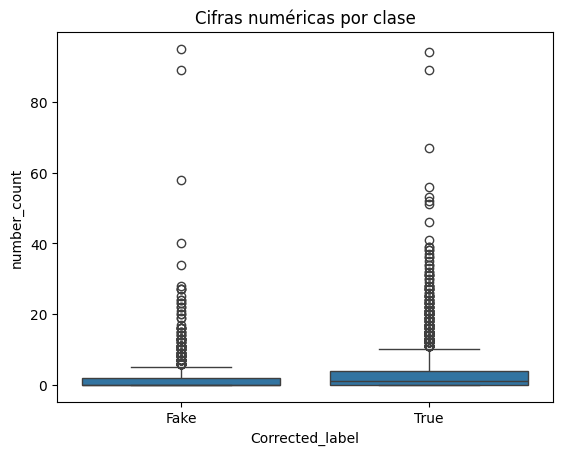

In [21]:
df["number_count"] = df["Text"].apply(lambda x: len(re.findall(r'\b\d+(\.\d+)?\b', str(x))))
sns.boxplot(data=df, x="Corrected_label", y="number_count")
plt.title("Cifras numéricas por clase")
plt.show()


## 7. UMAP + TF-IDF para agrupación de temas

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


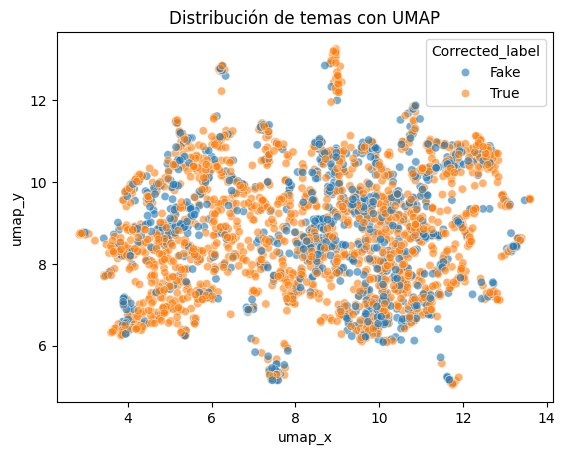

In [28]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords_es)
X = vectorizer.fit_transform(df["clean_text"])

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X.toarray())

df["umap_x"] = embedding[:,0]
df["umap_y"] = embedding[:,1]

sns.scatterplot(data=df, x="umap_x", y="umap_y", hue="Corrected_label", alpha=0.6)
plt.title("Distribución de temas con UMAP")
plt.show()


# Posadas

In [29]:
# Crear una copia y dejar solo columnas clave
dfp = df_posadas.copy()
dfp = dfp[["Text", "Category", "Source"]].dropna(subset=["Text"])

# Normalización del texto
def clean_text(text):
    text = unidecode(text.lower())
    text = re.sub(r'\d+', '', text)  # eliminar números
    text = re.sub(r'[^\w\s]', '', text)  # eliminar puntuación
    return text

dfp["clean_text"] = dfp["Text"].astype(str).apply(clean_text)

In [30]:
def get_top_words(df_subset, n=20):
    words = " ".join(df_subset["clean_text"]).split()
    words = [w for w in words if w not in stopwords_es]
    return Counter(words).most_common(n)

print("🔴 Fake News - Posadas:")
print(get_top_words(dfp[dfp["Category"] == "Fake"]))

print("\n🟢 True News - Posadas:")
print(get_top_words(dfp[dfp["Category"] == "True"]))

🔴 Fake News - Posadas:
[('number', 1025), ('mexico', 468), ('pais', 227), ('anos', 217), ('presidente', 185), ('gobierno', 162), ('gente', 143), ('pena', 136), ('obrador', 132), ('partido', 132), ('personas', 124), ('mundo', 123), ('lopez', 120), ('mexicanos', 117), ('candidato', 116), ('vida', 113), ('nombre', 112), ('pri', 112), ('nacional', 110), ('nieto', 110)]

🟢 True News - Posadas:
[('number', 3667), ('mexico', 682), ('anos', 476), ('pais', 319), ('gobierno', 299), ('presidente', 298), ('lopez', 287), ('millones', 281), ('obrador', 247), ('ano', 238), ('mil', 237), ('nacional', 233), ('pena', 216), ('personas', 209), ('caso', 201), ('ciudad', 190), ('partido', 190), ('unidos', 189), ('candidato', 187), ('mundo', 171)]


In [31]:
def show_top_ngrams(texts, ngram_range=(2,2), n=15):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words=stopwords_es).fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

print("Top Bigramas en Fake News (Posadas):")
print(show_top_ngrams(dfp[dfp["Category"] == "Fake"]["clean_text"]))

print("\nTop Trigramas en Fake News (Posadas):")
print(show_top_ngrams(dfp[dfp["Category"] == "Fake"]["clean_text"], (3,3)))


Top Bigramas en Fake News (Posadas):
[('number anos', np.int64(112)), ('lopez obrador', np.int64(103)), ('pena nieto', np.int64(95)), ('andres manuel', np.int64(71)), ('number number', np.int64(59)), ('manuel lopez', np.int64(59)), ('enrique pena', np.int64(53)), ('redes sociales', np.int64(53)), ('conferencia prensa', np.int64(48)), ('number millones', np.int64(42)), ('ciudad mexico', np.int64(39)), ('angelica rivera', np.int64(36)), ('donald trump', np.int64(34)), ('number mil', np.int64(32)), ('number horas', np.int64(27))]

Top Trigramas en Fake News (Posadas):
[('andres manuel lopez', np.int64(59)), ('manuel lopez obrador', np.int64(59)), ('enrique pena nieto', np.int64(52)), ('jose antonio meade', np.int64(24)), ('presidente enrique pena', np.int64(15)), ('number millones dolares', np.int64(14)), ('partido revolucionario institucional', np.int64(14)), ('cito medios conferencia', np.int64(12)), ('mexico conferencia prensa', np.int64(12)), ('number number number', np.int64(11)), ('

In [32]:
def extract_entities(texts, label):
    ents = []
    for doc in nlp.pipe(texts, disable=["parser", "tagger"]):
        ents += [ent.text for ent in doc.ents if ent.label_ == label]
    return Counter(ents).most_common(10)

# Puedes tomar una muestra para acelerar
top_persons = extract_entities(dfp["Text"].sample(300), "PER")
top_orgs = extract_entities(dfp["Text"].sample(300), "ORG")
top_places = extract_entities(dfp["Text"].sample(300), "LOC")

print("👤 Personas más mencionadas (Posadas):", top_persons)
print("🏢 Organizaciones más mencionadas (Posadas):", top_orgs)
print("🌍 Lugares más mencionados (Posadas):", top_places)


👤 Personas más mencionadas (Posadas): [('NUMBER', 316), ('México', 50), ('López Obrador', 45), ('Andrés Manuel López Obrador', 39), ('Según', 38), ('AMLO', 37), ('Peña Nieto', 34), ('Enrique Peña Nieto', 31), ('Trump', 31), ('Además', 30)]
🏢 Organizaciones más mencionadas (Posadas): [('NUMBER', 409), ('PRI', 72), ('PAN', 35), ('Congreso', 26), ('PRD', 20), ('CFE', 17), ('Televisa', 16), ('PSOE', 14), ('Google', 13), ('Spotify', 12)]
🌍 Lugares más mencionados (Posadas): [('México', 154), ('NUMBER', 127), ('NUMBER*%', 115), ('Estados Unidos', 55), ('América', 39), ('la Tierra', 38), ('Ciudad de México', 32), ('Rusia', 25), ('Casa Blanca', 23), ('España', 17)]


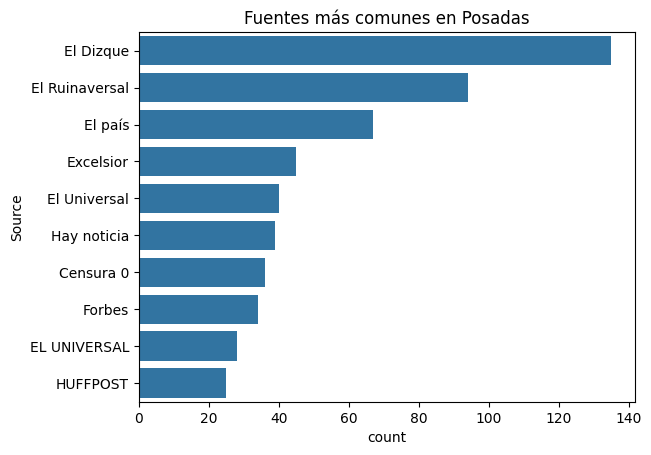

In [34]:
sns.countplot(data=dfp, y="Source", order=dfp["Source"].value_counts().head(10).index)
plt.title("Fuentes más comunes en Posadas")
plt.show()


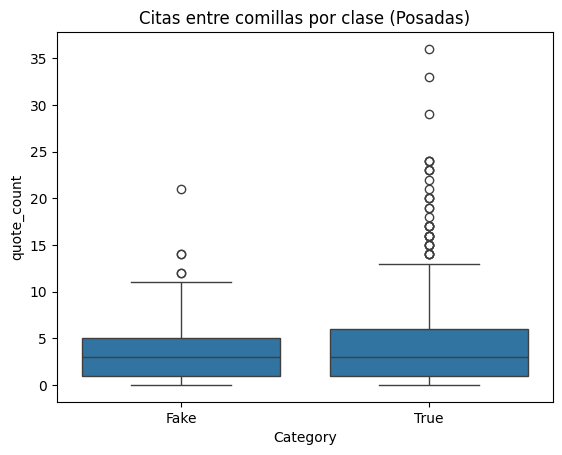

In [35]:
dfp["quote_count"] = dfp["Text"].apply(lambda x: len(re.findall(r'"[^"]+"', str(x))))
sns.boxplot(data=dfp, x="Category", y="quote_count")
plt.title("Citas entre comillas por clase (Posadas)")
plt.show()


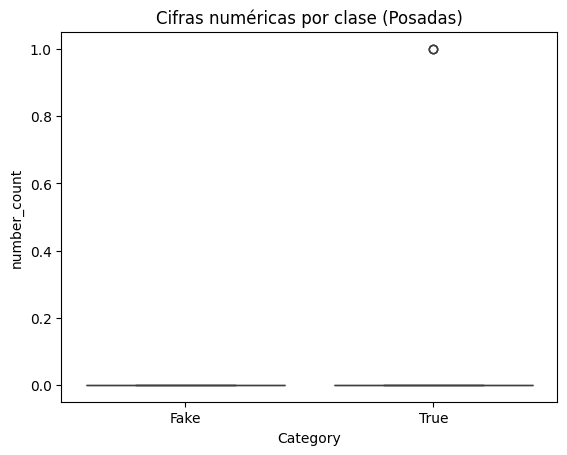

In [36]:
dfp["number_count"] = dfp["Text"].apply(lambda x: len(re.findall(r'\b\d+(\.\d+)?\b', str(x))))
sns.boxplot(data=dfp, x="Category", y="number_count")
plt.title("Cifras numéricas por clase (Posadas)")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


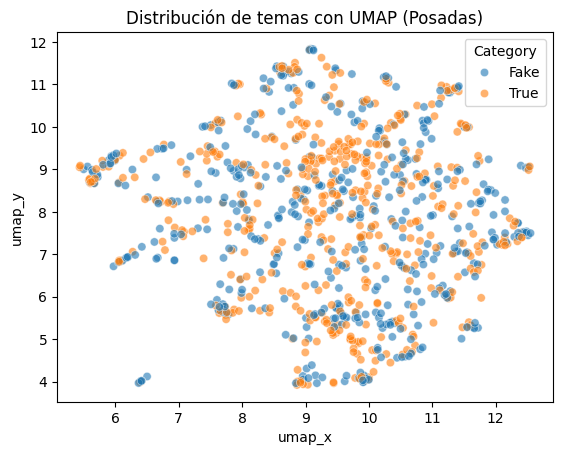

In [38]:
vectorizer_pos = TfidfVectorizer(max_features=1000, stop_words=stopwords_es)
X_pos = vectorizer_pos.fit_transform(dfp["clean_text"])

reducer_pos = umap.UMAP(random_state=42)
embedding_pos = reducer_pos.fit_transform(X_pos.toarray())

dfp["umap_x"] = embedding_pos[:,0]
dfp["umap_y"] = embedding_pos[:,1]

sns.scatterplot(data=dfp, x="umap_x", y="umap_y", hue="Category", alpha=0.6)
plt.title("Distribución de temas con UMAP (Posadas)")
plt.show()
